Single-Layer Perceptron for Binary Classification

Implementing a perceptron with no hidden layer that can separate two classes (0 and 1).

1.Step activation function
2.Perceptron learning rule
3.Iterative weight update

In [3]:
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

w = np.random.rand(2)
b = np.random.rand()

def step(z):
    return 1 if z >= 0 else 0

# Training perceptron
lr = 0.1
epochs = 10

for _ in range(epochs):
    for i in range(len(X)):
        y_pred = step(np.dot(X[i], w) + b)
        w += lr * (y[i] - y_pred) * X[i]
        b += lr * (y[i] - y_pred)

print("Trained weights:", w)
print("Bias:", b)


Trained weights: [0.14774426 0.33496303]
Bias: -0.38412604747869306


In [10]:
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self, X, y):       
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(linear_output)
                self.weights += self.lr * (y[i] - y_pred) * X[i]
                self.bias += self.lr * (y[i] - y_pred)
    def activation(self, x):
        return 1 if x >= 0 else 0
    def predict(self, X):
        predictions = []
        for x in X:
            linear_output = np.dot(x, self.weights) + self.bias
            predictions.append(self.activation(linear_output))
        return predictions
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
)
y = np.array([0, 0, 0, 1])
p = Perceptron(learning_rate=0.1, epochs=20)
p.fit(X, y)
print("Predictions:")
print(p.predict(X))




Predictions:
[0, 0, 0, 1]


Final Accuracy: 99.50%


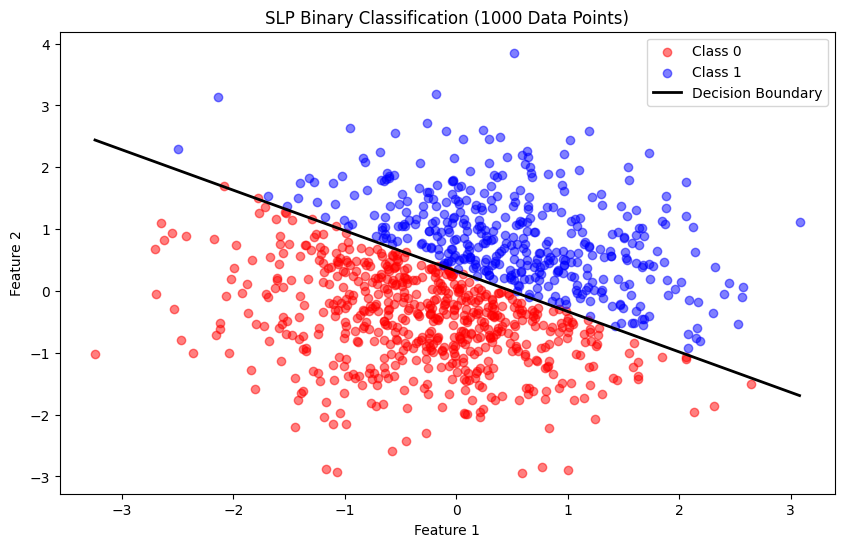

In [11]:
##
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.randn(1000, 2)
 
y = np.where(2*X[:, 0] + 3*X[:, 1] - 1 > 0, 1, 0)

class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):
            for i in range(len(X)):                
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
model = Perceptron(lr=0.1, epochs=20)
model.fit(X, y)

predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1', alpha=0.5)

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(model.weights[0] * x_vals + model.bias) / model.weights[1]
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Decision Boundary')

plt.title("SLP Binary Classification (1000 Data Points)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Build MLP with Custom Forward + Backpropagation

Implementing a Multi-Layer Perceptron (MLP) from scratch with no high-level library.

*Create input → hidden → output layer
*Define forward pass
*Compute loss
*Implement backprop manually


In [5]:
import numpy as np

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

W1 = np.random.randn(2, 2)
b1 = np.zeros((1,2))
W2 = np.random.randn(2, 1)
b2 = np.zeros((1,1))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

lr = 0.1

for _ in range(10000):
    # Forward pass
    h = sigmoid(np.dot(X, W1) + b1)
    y_pred = sigmoid(np.dot(h, W2) + b2)

    # Loss derivative
    error = y - y_pred

    # Backpropagation
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(h)

    # Update weights
    W2 += h.T.dot(d_output) * lr
    W1 += X.T.dot(d_hidden) * lr

print("Final Output:\n", y_pred)

# Backpropagation step only (core idea)

loss = np.mean((y - y_pred)**2)

d_loss = 2*(y_pred - y)/len(y)

d_w2 = h.T.dot(d_loss * sigmoid_derivative(y_pred))
d_w1 = X.T.dot((d_loss.dot(W2.T)) * sigmoid_derivative(h))

W2 -= lr * d_w2
W1 -= lr * d_w1



Final Output:
 [[0.17119083]
 [0.76544948]
 [0.76545499]
 [0.30671223]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(1000, 2)

y = np.where((X[:, 0]**2 + X[:, 1]**2) < 1.5, 1, 0).reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class MLP_Forward:
    def __init__(self, input_size, hidden_size, output_size):
       
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward_pass(self, X):
        
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
       
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

mlp_fwd = MLP_Forward(input_size=2, hidden_size=4, output_size=1)
initial_predictions = mlp_fwd.forward_pass(X)

print("Forward Pass complete.")
print(f"Shape of output: {initial_predictions.shape}")
print(f"Sample prediction (before training): {initial_predictions[0]}")

Implement Backpropagation Neural Network

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(1000, 2)

y = np.where((X[:, 0]**2 + X[:, 1]**2) < 1.5, 1, 0).reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

class MLP_Forward:
    def __init__(self, input_size, hidden_size, output_size):
        
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward_pass(self, X):
      
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
      
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2


class MLP_Backprop(MLP_Forward):
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        
        super().__init__(input_size, hidden_size, output_size)
        self.lr = lr

    def backward_pass(self, X, y, output):
       
        error_output = y - output
        delta_output = error_output * sigmoid_derivative(output)

        # 2 (Backpropagation)
        error_hidden = delta_output.dot(self.W2.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.a1)

        # 3. Weight Updates 
        self.W2 += self.a1.T.dot(delta_output) * self.lr
        self.b2 += np.sum(delta_output, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(delta_hidden) * self.lr
        self.b1 += np.sum(delta_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            output = self.forward_pass(X)
            self.backward_pass(X, y, output)
            if epoch % 2000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

nn = MLP_Backprop(input_size=2, hidden_size=8, output_size=1, lr=0.01)
print("Starting Training...")
nn.train(X, y, epochs=10000)

final_out = nn.forward_pass(X)
final_preds = np.where(final_out >= 0.5, 1, 0)
accuracy = np.mean(final_preds == y)
print(f"\nFinal Accuracy after Backpropagation: {accuracy * 100:.2f}%")


Starting Training...
Epoch 0, Loss: 0.3621
Epoch 2000, Loss: 0.0134
Epoch 4000, Loss: 0.0099
Epoch 6000, Loss: 0.0083
Epoch 8000, Loss: 0.0073

Final Accuracy after Backpropagation: 99.50%


Gradient Descent, SGD, and Momentum + Plot
Compare optimization methods on a simple function.

Function:
         
         𝑓(𝑥)=𝑥^2


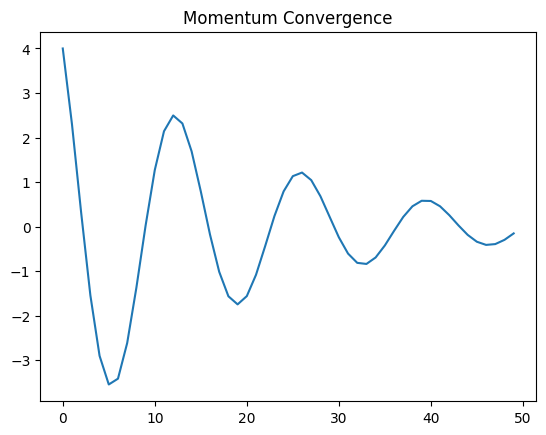

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad(x):
    return 2*x

x = 5
lr = 0.1
momentum = 0
beta = 0.9

values = []

for _ in range(50):
    momentum = beta * momentum + lr * grad(x)
    x -= momentum
    values.append(x)

plt.plot(values)
plt.title("Momentum Convergence")
plt.show()


Manual Convolution (Edge Detection / Blur)

In [8]:
import numpy as np
from PIL import Image

img = np.array(Image.open("image.jpg").convert("L"))

# Edge detection filter
kernel = np.array([[-1,-1,-1],
                   [-1, 8,-1],
                   [-1,-1,-1]])

h, w = img.shape
output = np.zeros_like(img)

for i in range(1, h-1):
    for j in range(1, w-1):
        output[i,j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)

Image.fromarray(output).show()


FileNotFoundError: [Errno 2] No such file or directory: 'image.jpg'

CNN on MNIST using PyTorch


In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()
train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 16, 3)
        self.fc = nn.Linear(16*26*26, 10)

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1):
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print("Training Done")


In [ ]:
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self, X, y):       
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(linear_output)
                self.weights += self.lr * (y[i] - y_pred) * X[i]
                self.bias += self.lr * (y[i] - y_pred)
    def activation(self, x):
        return 1 if x >= 0 else 0
    def predict(self, X):
        predictions = []
        for x in X:
            linear_output = np.dot(x, self.weights) + self.bias
            predictions.append(self.activation(linear_output))
        return predictions
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
)
y = np.array([0, 0, 0, 1])
p = Perceptron(learning_rate=0.1, epochs=20)
p.fit(X, y)
print("Predictions:")
print(p.predict(X))





In [ ]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.randn(1000, 2)
 
y = np.where(2*X[:, 0] + 3*X[:, 1] - 1 > 0, 1, 0)

class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):
            for i in range(len(X)):                
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
model = Perceptron(lr=0.1, epochs=20)
model.fit(X, y)

predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1', alpha=0.5)

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(model.weights[0] * x_vals + model.bias) / model.weights[1]
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Decision Boundary')

plt.title("SLP Binary Classification (1000 Data Points)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()